# Visualizing 2D and 3D Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
data_dir_visualize_2d = r"S:\Nit Durgapur\College 4th Sem\JU Internship\Fins Heat Prediction\ANN Model\2D Data"
bt_folders_visualize_2d = ['B.T. 340']

In [3]:
data_dir_visualize_3d = r"S:\Nit Durgapur\College 4th Sem\JU Internship\Fins Heat Prediction\ANN Model\3D Visualize Data"
z_planes_visualize_3d = ['Z = + 0 mm', 'Z = + 100 mm', 'Z = + 175 mm', 'Z = + 275 mm', 'Z = + 375 mm', 'Z = + 475 mm']

In [4]:
all_temp_data_2d = []

# Loop over folders
for folder in bt_folders_visualize_2d:
    folder_path_2d = os.path.join(data_dir_visualize_2d, folder)
    
    for filename in os.listdir(folder_path_2d):
        if filename.lower().endswith('temp.csv'):
            file_path_2d = os.path.join(folder_path_2d, filename)
            df_visualize_2d = pd.read_csv(file_path_2d)
            df_visualize_2d.columns = ['x', 'y', 'z', 'Temperature'] 
            df_visualize_2d['BT'] = int(folder.split('.')[-1])
            all_temp_data_2d.append(df_visualize_2d)

df_visualize_2d = pd.concat(all_temp_data_2d, ignore_index = True)

In [5]:
df_visualize_2d

,x,y,z,Temperature,BT
0,0.096000,0.180003,0,300.0,340
1,0.096002,0.181001,0,300.0,340
2,0.095002,0.181004,0,300.0,340
3,0.094999,0.180003,0,300.0,340
4,0.095999,0.182005,0,300.0,340
...,...,...,...,...,...
347749,0.000000,0.297000,0,300.0,340
347750,0.000000,0.298000,0,300.0,340
347751,0.000000,0.299000,0,300.0,340
347752,0.000000,0.300000,0,300.0,340


In [6]:
all_temp_data_3d = []

# Loop over folders
for folder in z_planes_visualize_3d:
    folder_path_3d = os.path.join(data_dir_visualize_3d, folder)

    for filename in os.listdir(folder_path_3d):
        if filename.lower().endswith('temp.csv'):
            file_path_3d = os.path.join(folder_path_3d, filename)
            df_visualize_3d = pd.read_csv(file_path_3d)
            df_visualize_3d.columns = ['x', 'y', 'z', 'Temperature']
            df_visualize_3d['Z'] = int(folder.split('+')[1].split('mm')[0].strip())
            all_temp_data_3d.append(df_visualize_3d)

df_visualize_3d = pd.concat(all_temp_data_3d, ignore_index = True)
df_visualize_3d = df_visualize_3d[['x', 'y', 'Z', 'Temperature']]

In [7]:
df_visualize_3d

,x,y,Z,Temperature
0,0.180000,0.020000,0,340.074
1,0.190000,0.020000,0,340.069
2,0.190000,0.030000,0,340.069
3,0.180000,0.030000,0,340.070
4,0.180000,0.010000,0,340.073
...,...,...,...,...
28257,-0.056509,0.089529,475,300.000
28258,0.258965,0.084843,475,300.000
28259,0.246018,0.095577,475,300.000
28260,-0.092987,0.114705,475,300.000


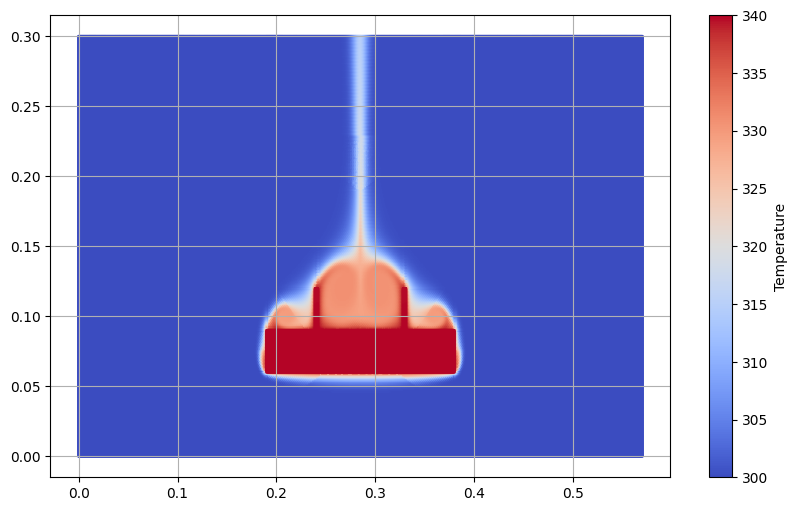

In [8]:
bt_value_2d = 340
df_bt = df_visualize_2d[df_visualize_2d['BT'] == bt_value_2d]

plt.figure(figsize = (10, 6))
plt.scatter(df_bt['x'], df_bt['y'], c = df_bt['Temperature'], cmap = 'coolwarm', s = 1)
plt.colorbar(label = 'Temperature')
plt.grid(True)
plt.show()

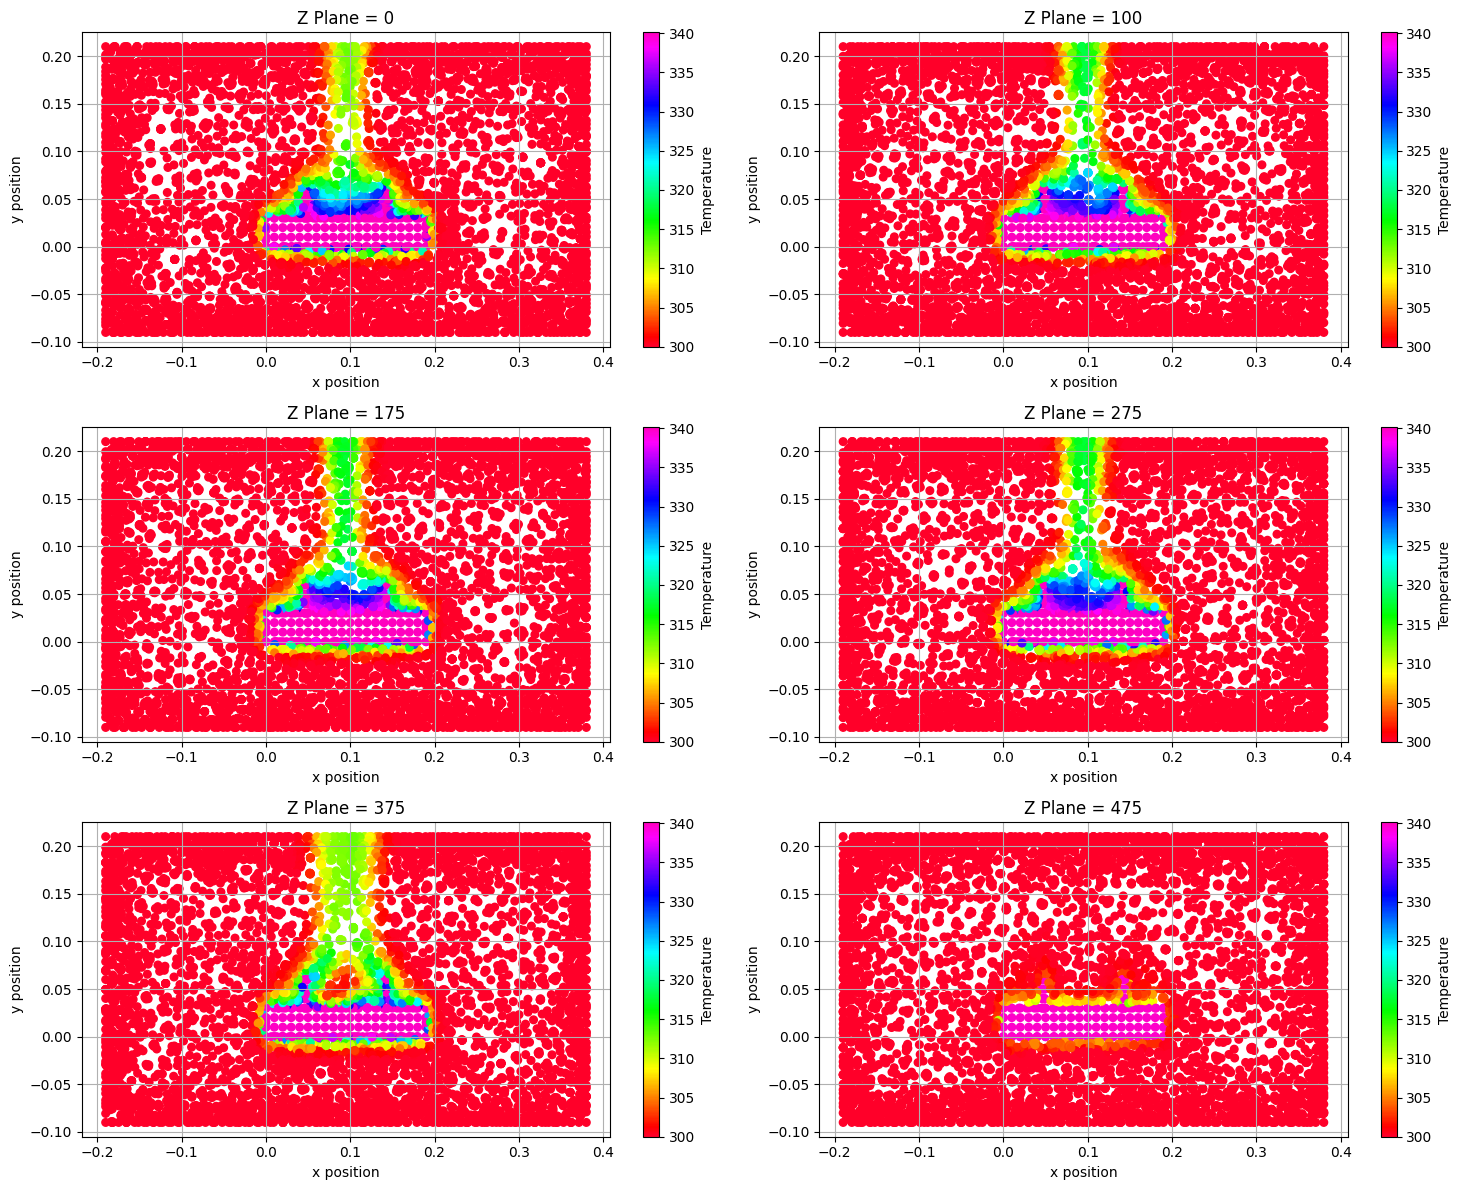

In [9]:
unique_bcs = sorted(df_visualize_3d['Z'].unique())

n_cols = 2
n_rows = 3

fig, axes = plt.subplots(n_rows, n_cols, figsize = (15, 12))
axes = axes.flatten() 

for idx, z_plane in enumerate(unique_bcs):
    df_bt = df_visualize_3d[df_visualize_3d['Z'] == z_plane]
    
    ax = axes[idx]
    scatter = ax.scatter(
        df_bt['x'], 
        df_bt['y'], 
        c = df_bt['Temperature'], 
        cmap = 'gist_rainbow', 
        s = 30, 
        vmin = df_visualize_3d['Temperature'].min(), 
        vmax = df_visualize_3d['Temperature'].max()
    )
    ax.set_title(f'Z Plane = {z_plane}')
    ax.set_xlabel('x position')
    ax.set_ylabel('y position')
    ax.grid(True)
    cbar = fig.colorbar(scatter, ax = ax)
    cbar.set_label('Temperature')

plt.tight_layout()
plt.show()

## Up-Sampling 3D Data Points

In [10]:
from scipy.spatial import cKDTree

In [11]:
df_interpolate_3d = df_visualize_3d.copy()
df_interpolate_3d = df_interpolate_3d[['x', 'y', 'Z', 'Temperature']]
df_interpolate_2d = df_visualize_2d.copy()
df_interpolate_2d = df_interpolate_2d[['x', 'y', 'Temperature']]

In [12]:
df_3d = df_interpolate_3d[df_visualize_3d['Z'] == 0][['x', 'y', 'Temperature']].dropna()
df_2d = df_interpolate_2d[['x', 'y']].dropna()

In [13]:
points_3d = df_3d[['x', 'y']].values
values_3d = df_3d['Temperature'].values
points_2d = df_2d[['x', 'y']].values

In [14]:
k_neighbors = 10
power = 2

In [15]:
tree = cKDTree(points_3d)

In [16]:
distances, indices = tree.query(points_2d, k = k_neighbors)

In [17]:
weights = 1.0 / (distances**power + 1e-9)
weights /= weights.sum(axis = 1)[ :, np.newaxis]

In [18]:
temp_interpolated = np.sum(values_3d[indices] * weights, axis = 1)

In [19]:
df_upsampled = pd.DataFrame({
    'X': points_2d[ :, 0],
    'Y': points_2d[ :, 1],
    'Z': 0,
    'Temperature': temp_interpolated
})

In [20]:
df_upsampled.to_csv('S:\\Nit Durgapur\\College 4th Sem\\JU Internship\\Fins Heat Prediction\\ANN Model\\3D Up-Sampled Data\\z0_upsample_interpolated_data.csv', index = False)

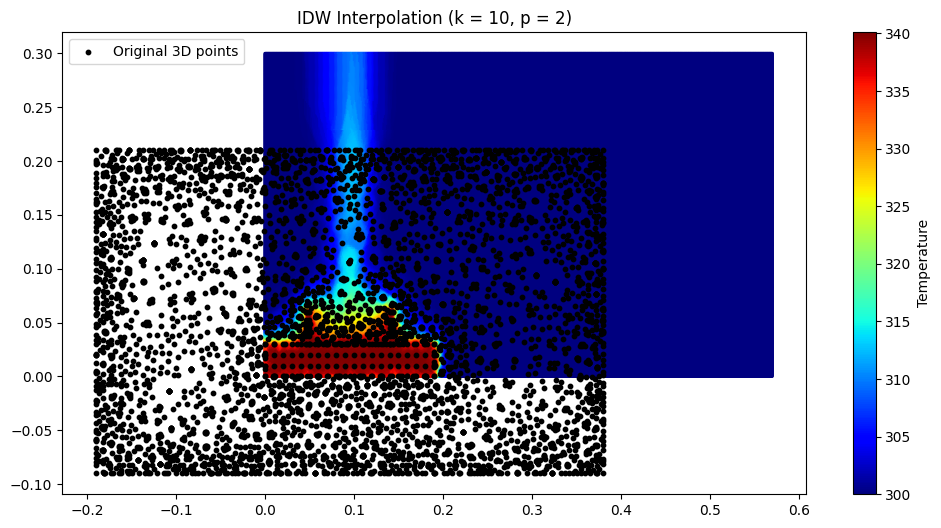

In [21]:
import matplotlib.pyplot as plt
plt.figure(figsize = (12, 6))
plt.scatter(df_upsampled['X'], df_upsampled['Y'], c = df_upsampled['Temperature'], s = 1, cmap = 'jet')
plt.colorbar(label = 'Temperature')
plt.scatter(points_3d[ :, 0], points_3d[ :, 1], c = 'black', s = 10, label = 'Original 3D points')
plt.title(f'IDW Interpolation (k = {k_neighbors}, p = {power})')
plt.legend()
plt.show()

In [22]:
z0_upsample_interpolated = pd.read_csv('S:\\Nit Durgapur\\College 4th Sem\\JU Internship\\Fins Heat Prediction\\ANN Model\\3D Up-Sampled Data\\z0_upsample_interpolated_data.csv')

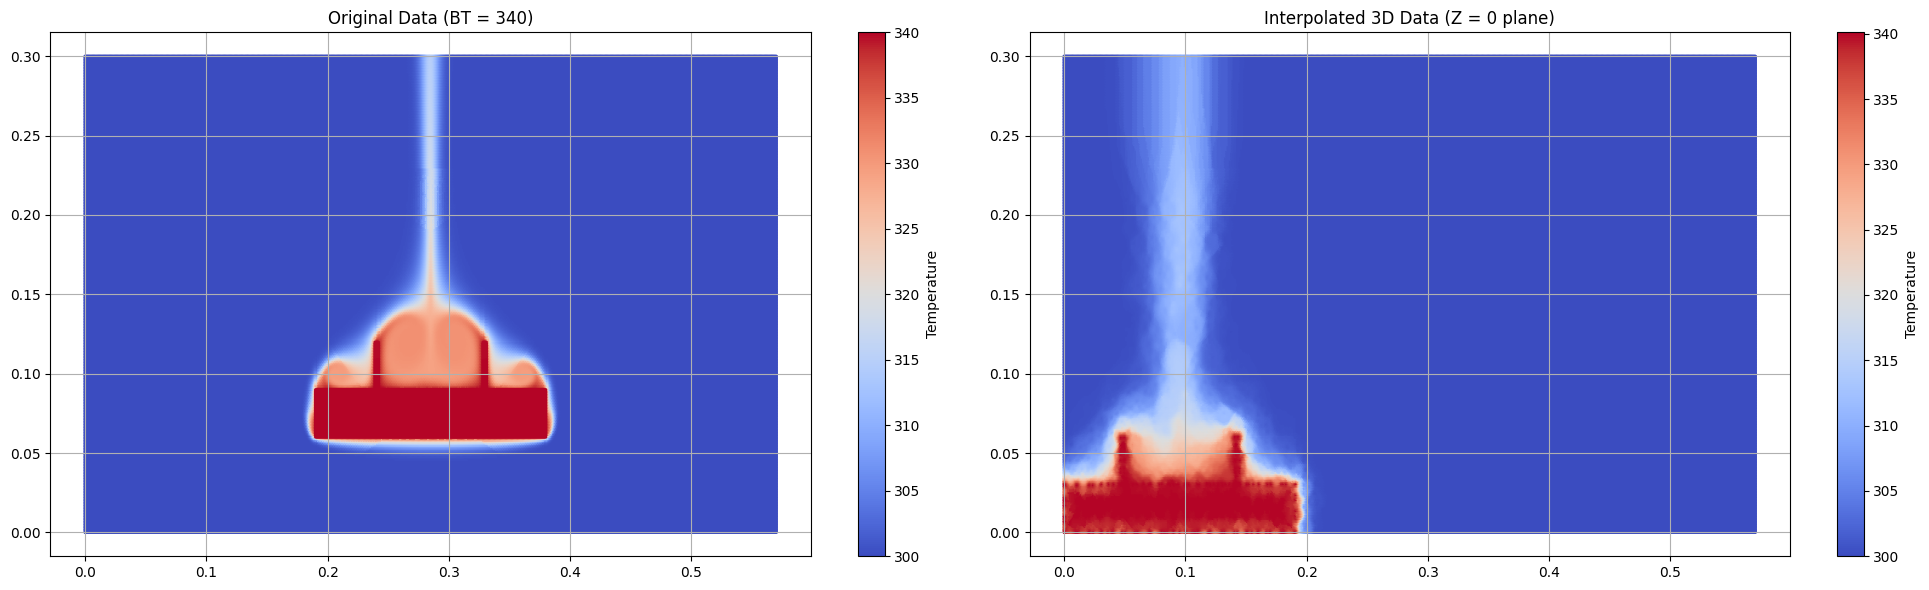

In [23]:
bt_value_2d = 340
df_bt = df_visualize_2d[df_visualize_2d['BT'] == bt_value_2d]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20, 6))

scatter1 = ax1.scatter(df_bt['x'], df_bt['y'], c = df_bt['Temperature'], cmap = 'coolwarm', s = 1)
fig.colorbar(scatter1, ax = ax1, label = 'Temperature')
ax1.grid(True)
ax1.set_title(f'Original Data (BT = {bt_value_2d})')

scatter2 = ax2.scatter(
    z0_upsample_interpolated['X'], 
    z0_upsample_interpolated['Y'], 
    c = z0_upsample_interpolated['Temperature'], 
    cmap = 'coolwarm', 
    s = 1,
    vmin = min(df_bt['Temperature'].min(), z0_upsample_interpolated['Temperature'].min()), 
    vmax = max(df_bt['Temperature'].max(), z0_upsample_interpolated['Temperature'].max())
)
fig.colorbar(scatter2, ax = ax2, label = 'Temperature')
ax2.grid(True)
ax2.set_title('Interpolated 3D Data (Z = 0 plane)')

plt.tight_layout()
plt.show()

# IDW Interpolation of all Z PLanes using cKDTree

In [24]:
data_interpolate_2d = r"S:\Nit Durgapur\College 4th Sem\JU Internship\Fins Heat Prediction\ANN Model\2D Data"
bt_folders_interpolate_2d = ['B.T. 340']
data_interpolate_3d = r"S:\Nit Durgapur\College 4th Sem\JU Internship\Fins Heat Prediction\ANN Model\3D Train Data"
z_planes_interpolate_3d = ['Z = + 0 mm', 'Z = + 175 mm', 'Z = + 275 mm', 'Z = + 475 mm']

## Combining all 2D and 3D Datas

In [25]:
all_temp_data_2d = []
for folder in bt_folders_interpolate_2d:
    folder_path_2d = os.path.join(data_interpolate_2d, folder)
    
    for filename in os.listdir(folder_path_2d):
        if filename.lower().endswith('temp.csv'):
            file_path_2d = os.path.join(folder_path_2d, filename)
            df_interpolate_2d = pd.read_csv(file_path_2d)
            df_interpolate_2d.columns = ['x', 'y', 'z', 'Temperature'] 
            df_interpolate_2d['BT'] = int(folder.split('.')[-1])
            all_temp_data_2d.append(df_interpolate_2d)

df_interpolate_2d = pd.concat(all_temp_data_2d, ignore_index = True)

all_temp_data_3d = []
for folder in z_planes_interpolate_3d:
    folder_path_3d = os.path.join(data_interpolate_3d, folder)
    
    for filename in os.listdir(folder_path_3d):
        if filename.lower().endswith('temp.csv'):
            file_path_3d = os.path.join(folder_path_3d, filename)
            df_interpolate_3d = pd.read_csv(file_path_3d)
            df_interpolate_3d.columns = ['x', 'y', 'z', 'Temperature']
            df_interpolate_3d['Z'] = int(folder.split('+')[1].split('mm')[0].strip())
            all_temp_data_3d.append(df_interpolate_3d)

df_interpolate_3d = pd.concat(all_temp_data_3d, ignore_index = True)
df_interpolate_3d = df_interpolate_3d[['x', 'y', 'Z', 'Temperature']]

In [26]:
unique_z_planes = sorted(df_interpolate_3d['Z'].unique())
print(f"Z planes to interpolate: {unique_z_planes}")

Z planes to interpolate: [0, 175, 275, 475]


In [27]:
df_2d = df_visualize_2d[['x', 'y']].dropna()
points_2d = df_2d[['x', 'y']].values

k_neighbors = 10
power = 2

for z_plane in unique_z_planes:
    df_3d_current = df_interpolate_3d[df_interpolate_3d['Z'] == z_plane][['x', 'y', 'Temperature']].dropna()

    points_3d_current = df_3d_current[['x', 'y']].values
    values_3d_current = df_3d_current['Temperature'].values
    
    tree = cKDTree(points_3d_current)

    distances, indices = tree.query(points_2d, k = k_neighbors)
    
    weights = 1.0 / (distances**power + 1e-9)
    weights /= weights.sum(axis = 1)[:, np.newaxis]
    
    temp_interpolated = np.sum(values_3d_current[indices] * weights, axis = 1)
    
    df_current_interpolated = pd.DataFrame({
        'X': df_2d['x'].values,
        'Y': df_2d['y'].values,
        'Z': z_plane,
        'Temperature_Interpolated': temp_interpolated
    })
    
    # Save individual CSV files for each Z plane
    output_file = f'S:\\Nit Durgapur\\College 4th Sem\\JU Internship\\Fins Heat Prediction\\ANN Model\\3D Up-Sampled Data\\z{z_plane}_upsample_interpolated_data.csv'
    df_current_interpolated.to_csv(output_file, index = False)
    print(f"Saved: z{z_plane}_upsample_interpolated_data.csv")

print("Interpolation completed successfully!")

Saved: z0_upsample_interpolated_data.csv
Saved: z175_upsample_interpolated_data.csv
Saved: z275_upsample_interpolated_data.csv
Saved: z475_upsample_interpolated_data.csv
Interpolation completed successfully!


## Merge all the Training Interpolated Files

In [28]:
input_folder = r"S:\Nit Durgapur\College 4th Sem\JU Internship\Fins Heat Prediction\ANN Model\3D Up-Sampled Data"
merged_output_file = os.path.join(input_folder, "all_z_planes_interpolated_data.csv")

interpolated_files = sorted([
    f for f in os.listdir(input_folder) 
    if f.startswith('z') and f.endswith('_upsample_interpolated_data.csv')
])

print(f"Found {len(interpolated_files)} interpolated files.")

all_data = []
for file_name in interpolated_files:
    file_path = os.path.join(input_folder, file_name)
    df = pd.read_csv(file_path)
    
    if {'X', 'Y', 'Z', 'Temperature_Interpolated'}.issubset(df.columns):
        all_data.append(df)

df_combined = pd.concat(all_data, ignore_index=True)

df_combined = df_combined.sort_values(by = ['Z'], kind = 'stable').reset_index(drop = True)

df_combined.to_csv(merged_output_file, index = False)

print(f"\n✅ Merged file saved at:\n{merged_output_file}")
print(f"Total rows: {len(df_combined)}")
print(f"Shape: {df_combined.shape}")
print(f"Z planes included: {sorted(df_combined['Z'].unique())}")

Found 4 interpolated files.

✅ Merged file saved at:
S:\Nit Durgapur\College 4th Sem\JU Internship\Fins Heat Prediction\ANN Model\3D Up-Sampled Data\all_z_planes_interpolated_data.csv
Total rows: 1391016
Shape: (1391016, 4)
Z planes included: [0, 175, 275, 475]


## Processing Del T for each Z Plane T3dz(x, y) - T2dz=0(x, y) = Del Tz(x, y)

In [29]:
data_dir_2d = r"S:\Nit Durgapur\College 4th Sem\JU Internship\Fins Heat Prediction\ANN Model\2D Data\B.T. 340"
merged_3d_file = r"S:\Nit Durgapur\College 4th Sem\JU Internship\Fins Heat Prediction\ANN Model\3D Up-Sampled Data\all_z_planes_interpolated_data.csv"
output_dir = r"S:\Nit Durgapur\College 4th Sem\JU Internship\Fins Heat Prediction\ANN Model\Delta_T_Outputs"

In [30]:
os.makedirs(output_dir, exist_ok = True)

file_2d = [f for f in os.listdir(data_dir_2d) if 'temp' in f.lower() and f.endswith('.csv')][0]
df_2d = pd.read_csv(os.path.join(data_dir_2d, file_2d))
df_2d.columns = ['x', 'y', 'z', 'Temperature_2D']

df_2d = df_2d[['x', 'y', 'Temperature_2D']]

df_3d = pd.read_csv(merged_3d_file)
df_3d.columns = ['X', 'Y', 'Z', 'Temperature_3D']

unique_z_planes = sorted(df_3d['Z'].unique())

print(f"Processing Del T for {len(unique_z_planes)} Z planes...")

for z_val in unique_z_planes:
    df_3d_z = df_3d[df_3d['Z'] == z_val].copy()
    before = len(df_3d_z)
    df_3d_z = df_3d_z.drop_duplicates(keep = 'first')
    after = len(df_3d_z)

    df_merged = pd.merge(df_3d_z, df_2d, left_on=['X', 'Y'], right_on=['x', 'y'], how='inner')

    df_merged['Delta_T'] = df_merged['Temperature_3D'] - df_merged['Temperature_2D']

    df_delta = df_merged[['X', 'Y', 'Z', 'Temperature_2D', 'Temperature_3D', 'Delta_T']]

    output_file = os.path.join(output_dir, f"delta_T_z{z_val}.csv")
    df_delta.to_csv(output_file, index=False)
    
    print(f"Saved Del T data for Z = {z_val} mm → {output_file}")

print("\n✅ Del T calculation for all planes done (duplicates removed).")

Processing Del T for 4 Z planes...
Saved Del T data for Z = 0 mm → S:\Nit Durgapur\College 4th Sem\JU Internship\Fins Heat Prediction\ANN Model\Delta_T_Outputs\delta_T_z0.csv
Saved Del T data for Z = 175 mm → S:\Nit Durgapur\College 4th Sem\JU Internship\Fins Heat Prediction\ANN Model\Delta_T_Outputs\delta_T_z175.csv
Saved Del T data for Z = 275 mm → S:\Nit Durgapur\College 4th Sem\JU Internship\Fins Heat Prediction\ANN Model\Delta_T_Outputs\delta_T_z275.csv
Saved Del T data for Z = 475 mm → S:\Nit Durgapur\College 4th Sem\JU Internship\Fins Heat Prediction\ANN Model\Delta_T_Outputs\delta_T_z475.csv

✅ Del T calculation for all planes done (duplicates removed).


## Merging all the Del T Files into 1 File

In [31]:
delta_t_folder = r"S:\Nit Durgapur\College 4th Sem\JU Internship\Fins Heat Prediction\ANN Model\Delta_T_Outputs"
combined_output_file = os.path.join(delta_t_folder, "all_delta_T_combined.csv")

delta_t_files = sorted([
    f for f in os.listdir(delta_t_folder)
    if f.startswith("delta_T_z") and f.endswith(".csv")
])

print(f"Found {len(delta_t_files)} Del T files to merge.")

all_delta_data = []
for file in delta_t_files:
    path = os.path.join(delta_t_folder, file)
    df = pd.read_csv(path)

    required_cols = {'X', 'Y', 'Z', 'Temperature_2D', 'Temperature_3D', 'Delta_T'}
    if required_cols.issubset(df.columns):
        all_delta_data.append(df)

df_combined = pd.concat(all_delta_data, ignore_index=True)

df_combined = df_combined.sort_values(by = ['Z'], kind = 'stable').reset_index(drop = True)

df_combined.to_csv(combined_output_file, index = False)

print(f"\n✅ Combined Del T file saved at:\n{combined_output_file}")
print(f"Shape: {df_combined.shape}")
print(f"Z planes included: {sorted(df_combined['Z'].unique())}")

Found 4 Del T files to merge.

✅ Combined Del T file saved at:
S:\Nit Durgapur\College 4th Sem\JU Internship\Fins Heat Prediction\ANN Model\Delta_T_Outputs\all_delta_T_combined.csv
Shape: (1391016, 6)
Z planes included: [0, 175, 275, 475]


# Training of the ANN Model

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
import joblib

In [33]:
data_file = r"S:\Nit Durgapur\College 4th Sem\JU Internship\Fins Heat Prediction\ANN Model\Delta_T_Outputs\all_delta_T_combined.csv"
df = pd.read_csv(data_file)

X = df[['X', 'Y', 'Z']].values
y = df['Delta_T'].values.reshape(-1, 1)

scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size = 0.2, random_state = 42)

In [41]:
model = Sequential([
    Dense(64, activation = 'relu', input_shape = (3,)),
    Dense(128, activation = 'relu'),
    Dense(64, activation = 'relu'),
    Dense(32, activation = 'relu'),
    BatchNormalization(),
    Dense(1, activation = 'linear')
])

model.compile(optimizer = 'adam', loss = 'mse', metrics = ['mae'])
early_stop = EarlyStopping(monitor = 'val_loss', patience = 5, restore_best_weights = True)

In [42]:
history = model.fit(
    X_train, y_train,
    validation_data = (X_test, y_test),
    epochs = 20,
    batch_size = 32,
    callbacks = [early_stop],
    verbose = 1
)

Epoch 1/20
34776/34776 [==============================] - 68s 2ms/step - loss: 0.0732 - mae: 0.1840 - val_loss: 0.0113 - val_mae: 0.0538
Epoch 2/20
34776/34776 [==============================] - 77s 2ms/step - loss: 0.0466 - mae: 0.1591 - val_loss: 0.0147 - val_mae: 0.0468
Epoch 3/20
34776/34776 [==============================] - 59s 2ms/step - loss: 0.0423 - mae: 0.1547 - val_loss: 0.0113 - val_mae: 0.0441
Epoch 4/20
34776/34776 [==============================] - 64s 2ms/step - loss: 0.0404 - mae: 0.1526 - val_loss: 0.0083 - val_mae: 0.0382
Epoch 5/20
34776/34776 [==============================] - 55s 2ms/step - loss: 0.0395 - mae: 0.1514 - val_loss: 0.0085 - val_mae: 0.0389
Epoch 6/20
34776/34776 [==============================] - 59s 2ms/step - loss: 0.0386 - mae: 0.1506 - val_loss: 0.0035 - val_mae: 0.0268
Epoch 7/20
34776/34776 [==============================] - 56s 2ms/step - loss: 0.0381 - mae: 0.1498 - val_loss: 0.0099 - val_mae: 0.0438
Epoch 8/20
34776/34776 [=================

In [43]:
loss, mae = model.evaluate(X_test, y_test)
print(f"\nScaled Test MAE: {mae : }")
print(f"Scaled Test MSE: {loss : }")

y_pred_scaled = model.predict(X_test)
y_pred_real = scaler_y.inverse_transform(y_pred_scaled)
y_test_real = scaler_y.inverse_transform(y_test)

mae_real = np.mean(np.abs(y_pred_real - y_test_real))
print(f"Real Temperature MAE: {mae_real : }")

8694/8694 [==============================] - 7s 800us/step - loss: 0.0032 - mae: 0.0257

Scaled Test MAE:  0.025714518502354622
Scaled Test MSE:  0.003228022949770093
8694/8694 [==============================] - 6s 727us/step
Real Temperature MAE:  0.35629571924575976


### Plot of Training and Validation Loss

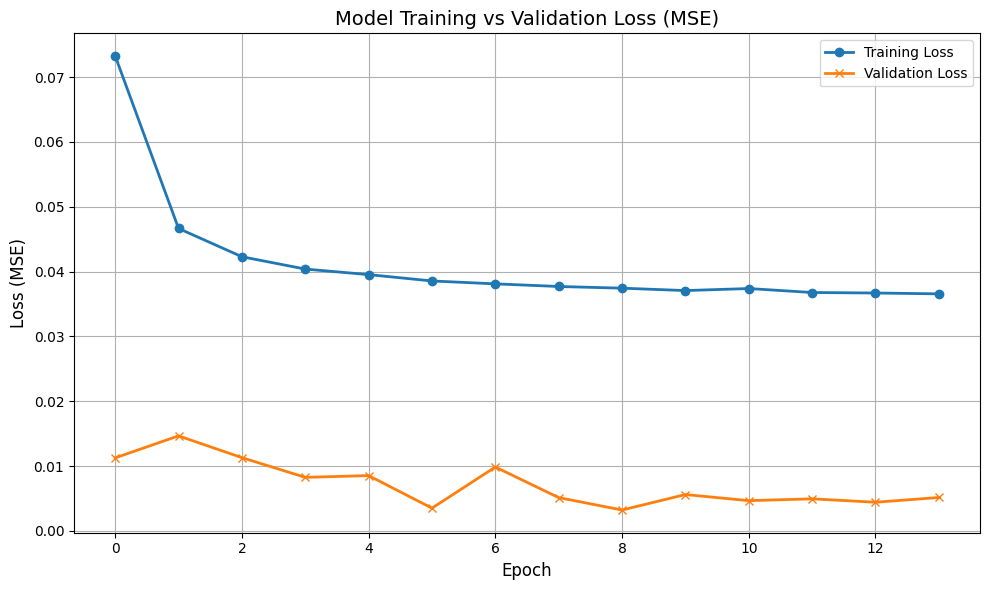

In [44]:
plt.figure(figsize = (10, 6))
plt.plot(history.history['loss'], label = 'Training Loss', linewidth = 2, marker = 'o')
plt.plot(history.history['val_loss'], label = 'Validation Loss', linewidth = 2, marker = 'x')
plt.title('Model Training vs Validation Loss (MSE)', fontsize = 14)
plt.xlabel('Epoch', fontsize = 12)
plt.ylabel('Loss (MSE)', fontsize = 12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [45]:
model.save("final_ann_model.h5")

In [46]:
joblib.dump(scaler_X, "scaler_X.pkl"), joblib.dump(scaler_y, "scaler_y.pkl")

(['scaler_X.pkl'], ['scaler_y.pkl'])

### Interpolation of the Test Data

In [48]:
df_2d = df_visualize_2d[['x', 'y']].dropna()
points_2d = df_2d[['x', 'y']].values

k_neighbors = 10
power = 2

target_z_planes = [100, 375]
output_folder = r"S:\Nit Durgapur\College 4th Sem\JU Internship\Fins Heat Prediction\ANN Model\3D Test Interpolated Data"

for z_plane in target_z_planes:
    df_3d_current = df_visualize_3d[df_visualize_3d['Z'] == z_plane][['x', 'y', 'Temperature']].dropna()

    points_3d_current = df_3d_current[['x', 'y']].values
    values_3d_current = df_3d_current['Temperature'].values

    tree = cKDTree(points_3d_current)
    distances, indices = tree.query(points_2d, k = k_neighbors)

    weights = 1.0 / (distances**power + 1e-9)
    weights /= weights.sum(axis = 1)[ :, np.newaxis]

    temp_interpolated = np.sum(values_3d_current[indices] * weights, axis = 1)

    df_current_interpolated = pd.DataFrame({
        'X': df_2d['x'].values,
        'Y': df_2d['y'].values,
        'Z': z_plane,
        'Temperature_Interpolated': temp_interpolated
    })

    output_file = os.path.join(output_folder, f'z{z_plane}_upsample_interpolated_data.csv')
    df_current_interpolated.to_csv(output_file, index = False)
    print(f"✅ Saved: z{z_plane}_upsample_interpolated_data.csv")

print("\n🎯 Interpolation for Z = 100 mm and Z = 375 mm completed!")

✅ Saved: z100_upsample_interpolated_data.csv
✅ Saved: z375_upsample_interpolated_data.csv

🎯 Interpolation for Z = 100 mm and Z = 375 mm completed!


In [49]:
output_folder = r"S:\Nit Durgapur\College 4th Sem\JU Internship\Fins Heat Prediction\ANN Model\3d Test Interpolated Data"

new_files = ['z100_upsample_interpolated_data.csv', 'z375_upsample_interpolated_data.csv']

all_data = []
for file_name in new_files:
    file_path = os.path.join(output_folder, file_name)
    df = pd.read_csv(file_path)
    if {'X', 'Y', 'Z', 'Temperature_Interpolated'}.issubset(df.columns):
        all_data.append(df)

df_z_100_375 = pd.concat(all_data, ignore_index = True)
df_z_100_375 = df_z_100_375.sort_values(by = ['Z'], kind = 'stable').reset_index(drop = True)

merged_subset_output_file = os.path.join(output_folder, "z100_375_planes_interpolated_data.csv")
df_z_100_375.to_csv(merged_subset_output_file, index = False)

print(f"\nMerged file saved at:\n{merged_subset_output_file}")
print(f"Total rows: {len(df_z_100_375)}")
print(f"Shape: {df_z_100_375.shape}")
print(f"Z planes included: {sorted(df_z_100_375['Z'].unique())}")


Merged file saved at:
S:\Nit Durgapur\College 4th Sem\JU Internship\Fins Heat Prediction\ANN Model\3d Test Interpolated Data\z100_375_planes_interpolated_data.csv
Total rows: 695508
Shape: (695508, 4)
Z planes included: [100, 375]


## Predicting Del T For Unknown Z Planes

In [50]:
from tensorflow.keras.models import load_model

model_path = "final_ann_model.h5"
scaler_X_path = "scaler_X.pkl"
scaler_y_path = "scaler_Y.pkl"
test_data_path = r"S:\Nit Durgapur\College 4th Sem\JU Internship\Fins Heat Prediction\ANN Model\3d Test Interpolated Data\z100_375_planes_interpolated_data.csv"
df_2d_file = r"S:\Nit Durgapur\College 4th Sem\JU Internship\Fins Heat Prediction\ANN Model\2D Data\B.T. 340\temp.csv"
output_dir = r"S:\Nit Durgapur\College 4th Sem\JU Internship\Fins Heat Prediction\ANN Model\Delta_T_Test_Predictions"

os.makedirs(output_dir, exist_ok = True)

model = load_model(model_path)
scaler_X = joblib.load(scaler_X_path)
scaler_y = joblib.load(scaler_y_path)

df_2d = pd.read_csv(df_2d_file)
df_2d.columns = ['x', 'y', 'z', 'Temperature_2D']
df_2d = df_2d[['x', 'y', 'Temperature_2D']]

df_test = pd.read_csv(test_data_path)
df_test = df_test[['X', 'Y', 'Z', 'Temperature_Interpolated']]

df_merged = pd.merge(df_test, df_2d, left_on = ['X', 'Y'], right_on = ['x', 'y'], how = 'inner')
df_merged = df_merged.drop(columns=['x', 'y'])

X_input = df_merged[['X', 'Y', 'Z']].values
X_scaled = scaler_X.transform(X_input)

delta_t_pred_scaled = model.predict(X_scaled)
delta_t_pred = scaler_y.inverse_transform(delta_t_pred_scaled).flatten()

df_merged['Delta_T_Actual'] = df_merged['Temperature_Interpolated'] - df_merged['Temperature_2D']
df_merged['Delta_T_Predicted'] = delta_t_pred
df_merged['Temperature_3D_Predicted'] = df_merged['Temperature_2D'] + df_merged['Delta_T_Predicted']
df_merged['Error'] = df_merged['Temperature_Interpolated'] - df_merged['Temperature_3D_Predicted']

for z_val in [100, 375]:
    df_plane = df_merged[df_merged['Z'] == z_val].copy()

    df_plane = df_plane.drop_duplicates(subset = ['X', 'Y'], keep = 'first')

    out_file = os.path.join(output_dir, f"delta_T_prediction_z{z_val}.csv")
    df_plane.to_csv(out_file, index = False)
    print(f"✅ Saved predictions for Z = {z_val} mm → {out_file} (Rows: {len(df_plane)})")

44656/44656 [==============================] - 29s 656us/step
✅ Saved predictions for Z = 100 mm → S:\Nit Durgapur\College 4th Sem\JU Internship\Fins Heat Prediction\ANN Model\Delta_T_Test_Predictions\delta_T_prediction_z100.csv (Rows: 171871)
✅ Saved predictions for Z = 375 mm → S:\Nit Durgapur\College 4th Sem\JU Internship\Fins Heat Prediction\ANN Model\Delta_T_Test_Predictions\delta_T_prediction_z375.csv (Rows: 171871)


## Plotting the Actual vs Predicted Temperature for Z = 100 mm and Z = 375 mm Planes respectively

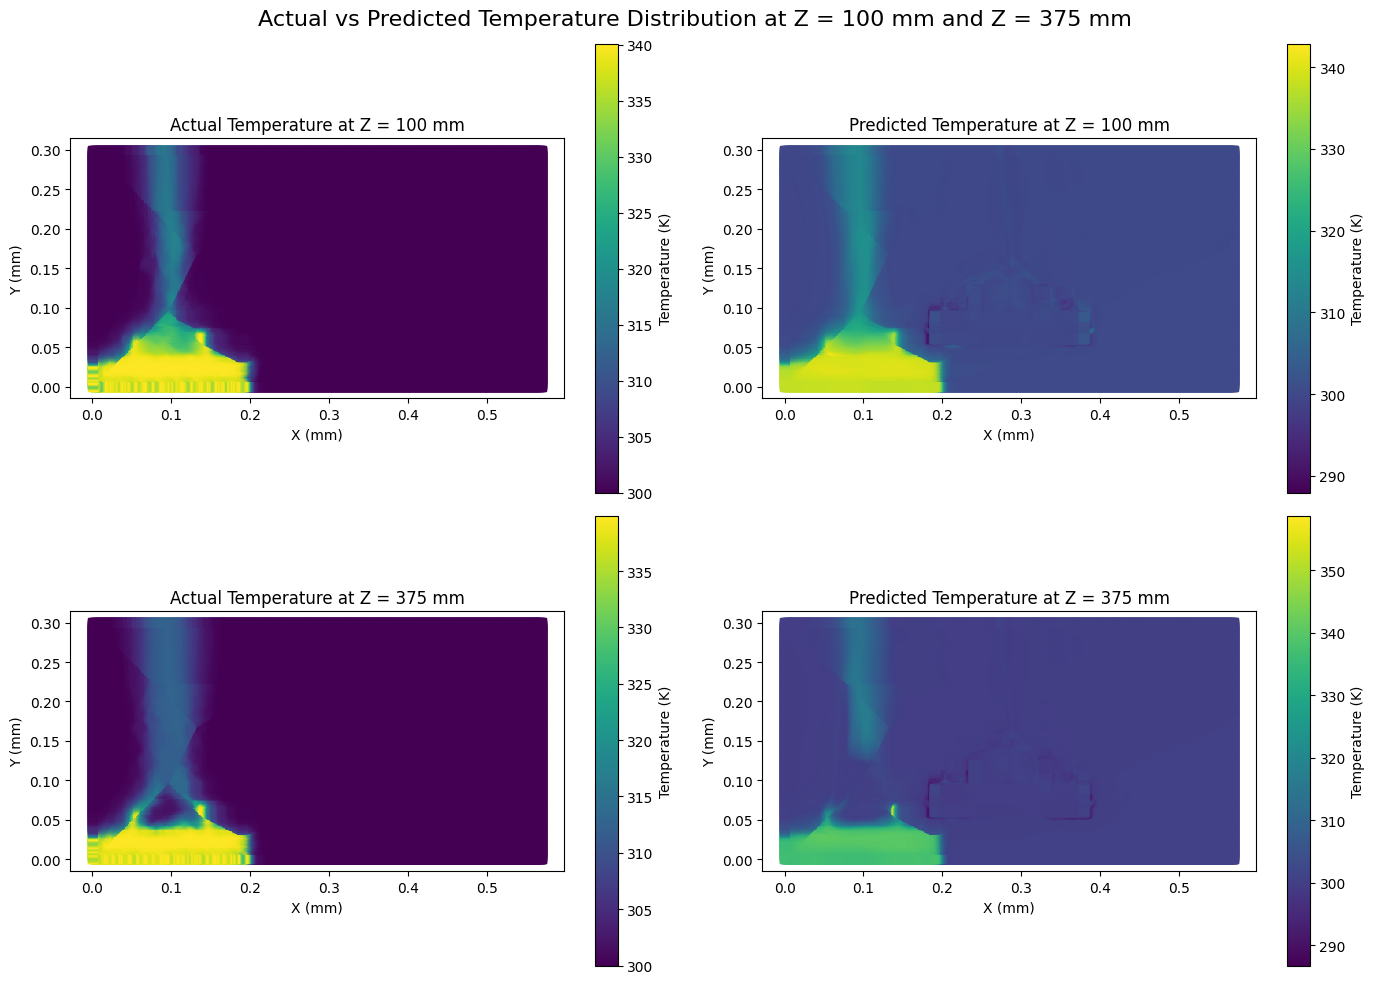

In [51]:
output_dir = r"S:\Nit Durgapur\College 4th Sem\JU Internship\Fins Heat Prediction\ANN Model\Delta_T_Test_Predictions"
file_z100 = os.path.join(output_dir, "delta_T_prediction_z100.csv")
file_z375 = os.path.join(output_dir, "delta_T_prediction_z375.csv")

df_100 = pd.read_csv(file_z100)
df_375 = pd.read_csv(file_z375)

fig, axs = plt.subplots(2, 2, figsize = (14, 10))

# Z = 100 mm - Actual
sc00 = axs[0, 0].scatter(df_100['X'], df_100['Y'], c = df_100['Temperature_Interpolated'], cmap = 'viridis', marker = 's')
axs[0, 0].set_title('Actual Temperature at Z = 100 mm')
axs[0, 0].set_xlabel('X (mm)')
axs[0, 0].set_ylabel('Y (mm)')
axs[0, 0].set_aspect('equal')
cbar00 = fig.colorbar(sc00, ax = axs[0, 0])
cbar00.set_label('Temperature (K)')

# Z = 100 mm - Predicted
sc01 = axs[0, 1].scatter(df_100['X'], df_100['Y'], c = df_100['Temperature_3D_Predicted'], cmap = 'viridis', marker = 's')
axs[0, 1].set_title('Predicted Temperature at Z = 100 mm')
axs[0, 1].set_xlabel('X (mm)')
axs[0, 1].set_ylabel('Y (mm)')
axs[0, 1].set_aspect('equal')
cbar01 = fig.colorbar(sc01, ax = axs[0, 1])
cbar01.set_label('Temperature (K)')

# Z = 375 mm - Actual
sc10 = axs[1, 0].scatter(df_375['X'], df_375['Y'], c = df_375['Temperature_Interpolated'], cmap = 'viridis', marker = 's')
axs[1, 0].set_title('Actual Temperature at Z = 375 mm')
axs[1, 0].set_xlabel('X (mm)')
axs[1, 0].set_ylabel('Y (mm)')
axs[1, 0].set_aspect('equal')
cbar10 = fig.colorbar(sc10, ax = axs[1, 0])
cbar10.set_label('Temperature (K)')

# Z = 375 mm - Predicted
sc11 = axs[1, 1].scatter(df_375['X'], df_375['Y'],  c = df_375['Temperature_3D_Predicted'], cmap = 'viridis', marker = 's')
axs[1, 1].set_title('Predicted Temperature at Z = 375 mm')
axs[1, 1].set_xlabel('X (mm)')
axs[1, 1].set_ylabel('Y (mm)')
axs[1, 1].set_aspect('equal')
cbar11 = fig.colorbar(sc11, ax = axs[1, 1])
cbar11.set_label('Temperature (K)')

# Adjust layout
plt.suptitle('Actual vs Predicted Temperature Distribution at Z = 100 mm and Z = 375 mm', fontsize = 16)
plt.tight_layout()
plt.show()